In [33]:
#!/usr/bin/env python
# coding: utf-8

import tensorflow as tf
from tensorflow import keras
import random
import os
import numpy as np

os.environ['PYTHONHASHSEED']=str(1)
tf.random.set_seed(1)
np.random.seed(1)
random.seed(1)

import sys
print("python version", sys.version)
print("TF version", tf.__version__)
if tf.test.is_gpu_available():
  print("GPU available")
else:
  print("GPU unavailable")


# load Fashion MNIST data
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

print(X_train_full.shape, X_test.shape)

# Valid set: ~3,000, Train set: 30,000
X_valid, X_train = X_train_full[:3000] / 255., X_train_full[30000:] / 255.  # do not change
y_valid, y_train = y_train_full[:3000], y_train_full[30000:]  # do not change
X_test = X_test / 255.  # do not change

# do not change
X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]
print(X_valid.shape, X_train.shape)
# do not change

from functools import partial
DefaultConv2D = partial(keras.layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")
# do not change
model = keras.models.Sequential([
    DefaultConv2D(filters=32, kernel_size=3, input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=64),
    keras.layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    keras.layers.Flatten(),
    keras.layers.Dense(units=128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(units=10, activation='softmax'),
])
# do not change
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="Adam", 
              metrics=["accuracy"])
model.summary()
# do not change

python version 3.8.15 (default, Oct 12 2022, 19:14:39) 
[GCC 7.5.0]
TF version 2.9.2
GPU available
(60000, 28, 28) (10000, 28, 28)
(3000, 28, 28, 1) (30000, 28, 28, 1)
Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_43 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 7, 7, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_44 (Conv2

Epoch 1/20
938/938 [==============================] - 5s 4ms/step - loss: 0.5083 - accuracy: 0.8165 - val_loss: 0.3453 - val_accuracy: 0.8730
Epoch 2/20
938/938 [==============================] - 4s 4ms/step - loss: 0.3212 - accuracy: 0.8836 - val_loss: 0.2950 - val_accuracy: 0.8940
Epoch 3/20
938/938 [==============================] - 4s 4ms/step - loss: 0.2687 - accuracy: 0.9016 - val_loss: 0.2633 - val_accuracy: 0.8973
Epoch 4/20
938/938 [==============================] - 4s 4ms/step - loss: 0.2324 - accuracy: 0.9144 - val_loss: 0.2451 - val_accuracy: 0.9130
Epoch 5/20
938/938 [==============================] - 4s 4ms/step - loss: 0.2025 - accuracy: 0.9250 - val_loss: 0.2551 - val_accuracy: 0.9100
Epoch 6/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1796 - accuracy: 0.9325 - val_loss: 0.2332 - val_accuracy: 0.9187
Epoch 7/20
938/938 [==============================] - 4s 4ms/step - loss: 0.1556 - accuracy: 0.9397 - val_loss: 0.2429 - val_accuracy: 0.9113
Epoch 

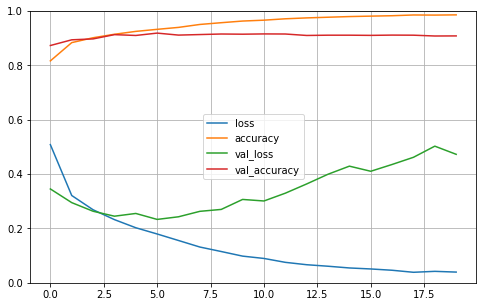

In [34]:
history = model.fit(X_train, y_train, epochs=20, 
                    batch_size=32,
                    validation_data=(X_valid, y_valid))
# do not change
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


In [35]:
org_acc = model.evaluate(X_test, y_test)  # do not change
print(org_acc[1]*100)

313/313 [==============================] - 1s 3ms/step - loss: 0.5319 - accuracy: 0.9100
91.00000262260437


In [36]:
from keras import backend as K

org_model_size = np.sum([K.count_params(w) for w in model.trainable_weights]) # do not change
print(org_model_size)

896906


In [37]:
# original FashionMNIST input shape is [28,28,1]
# if needed, data augmentation can be done here
from keras.layers import BatchNormalization, Conv2D, Activation, Dense, GlobalAveragePooling2D, MaxPooling2D, ZeroPadding2D, Add, Flatten, Dropout
from keras.models import Model, load_model
from keras.models import Sequential


#★★★★★ # preprocessing if applicable

your_model = Sequential([
    Conv2D(filters=128, kernel_size=(3, 3), input_shape=(28,28,1), activation='relu', padding = 'same'),
    MaxPooling2D(pool_size=2),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'same'),
    Conv2D(filters=256, kernel_size=(3, 3), activation='relu'),
    Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'same'),
    MaxPooling2D(pool_size = 2),
    Dense(units=64, activation="relu"),
    Flatten(),
    Dropout(0.25),
    Dense(units=10, activation='softmax')
])

your_model.compile(loss="sparse_categorical_crossentropy", 
              optimizer='adam', 
              metrics=["accuracy"])
your_model.summary()
your_model_size = np.sum([K.count_params(w) for w in your_model.trainable_weights])


Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_45 (Conv2D)          (None, 28, 28, 128)       1280      
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 14, 14, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_46 (Conv2D)          (None, 14, 14, 128)       147584    
                                                                 
 conv2d_47 (Conv2D)          (None, 12, 12, 256)       295168    
                                                                 
 conv2d_48 (Conv2D)          (None, 12, 12, 128)       295040    
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 6, 6, 128)        0         
 g2D)                                                

In [38]:

hist=your_model.fit(X_train, y_train, epochs=22, 
                    batch_size=17,
                    validation_data=(X_valid, y_valid))

yours=your_model.evaluate(X_test, y_test)


Epoch 1/22
1765/1765 [==============================] - 13s 7ms/step - loss: 0.4896 - accuracy: 0.8223 - val_loss: 0.3605 - val_accuracy: 0.8663
Epoch 2/22
1765/1765 [==============================] - 12s 7ms/step - loss: 0.3174 - accuracy: 0.8834 - val_loss: 0.3101 - val_accuracy: 0.8887
Epoch 3/22
1765/1765 [==============================] - 12s 7ms/step - loss: 0.2729 - accuracy: 0.9001 - val_loss: 0.2785 - val_accuracy: 0.9017
Epoch 4/22
1765/1765 [==============================] - 12s 7ms/step - loss: 0.2435 - accuracy: 0.9115 - val_loss: 0.2818 - val_accuracy: 0.8983
Epoch 5/22
1765/1765 [==============================] - 12s 7ms/step - loss: 0.2170 - accuracy: 0.9198 - val_loss: 0.2811 - val_accuracy: 0.9003
Epoch 6/22
1765/1765 [==============================] - 11s 6ms/step - loss: 0.1974 - accuracy: 0.9271 - val_loss: 0.2324 - val_accuracy: 0.9137
Epoch 7/22
1765/1765 [==============================] - 12s 7ms/step - loss: 0.1766 - accuracy: 0.9347 - val_loss: 0.2572 - val_ac

In [39]:

print("[Acc] performance improvement: %.2f percent" % (yours[1]*100 - org_acc[1]*100))
print("[Size] size ratio: %.2f percent" % ((your_model_size / org_model_size)*100) )
if (yours[1]*100 - org_acc[1]*100) > 0:
  print("Accuracy resolved")
if (your_model_size / org_model_size)*100 < 100:
  print("Size resolved")  

[Acc] performance improvement: 0.19 percent
[Size] size ratio: 85.89 percent
Accuracy resolved
Size resolved
